In [1]:
from scipy.optimize import minimize, LinearConstraint
import numpy as np
import pandas as pd
import os
from multiprocessing import freeze_support

from tontine.portfolio import Portfolio
from tontine.data import MarketData, MortalityData
from tontine.utils import pi

In [2]:
survival_curve = pd.read_excel("../data/AG2022prob.xlsx")
# TODO: internalise the fact that the time parameter is not allowed to be zero
# because it breaks the log-normal distribution
survival_curve = survival_curve[(survival_curve["t"] > 0) & (survival_curve["t"] <= 35)]

mort_data = MortalityData(0.04, survival_curve)

risk_loadings = {
    "annuity": 0.05,
    "tontine": 0.011,
    "ul_tontine": 0,
    "ul_annuity": 0.038,
}

### Scenario 1: $\gamma$ = 0.85

In [3]:
μ = 0.08
σ =  0.1
π = pi(μ, σ, mort_data, 0.85)

mkt_data = MarketData(μ, σ, π)
ptfl = Portfolio(1e5, 100, 0.85, risk_loadings, mkt_data, mort_data)

res = ptfl.optimise()


  5%|▌         | 5/100 [00:10<02:51,  1.80s/it]/Users/doubleuvee/tontine/.venv/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:316: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)
100%|██████████| 100/100 [03:44<00:00,  2.24s/it]


#### Weights

In [ ]:
ptfl.w

array([8.13656663e-07, 9.99997559e-01, 8.13656684e-07, 8.13656718e-07])

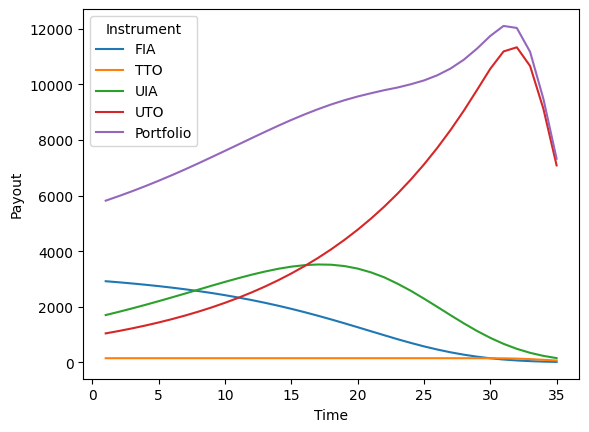

In [4]:
plot = ptfl.plot()
plot.savefig("../output/ptfl_scenario_085.svg")

### Scenario 2: $\gamma$ = 1.5

In [5]:
μ = 0.08
σ =  0.1
π = pi(μ, σ, mort_data, 1.5)

mkt_data = MarketData(μ, σ, π)
ptfl = Portfolio(1e5, 100, 1.5, risk_loadings, mkt_data, mort_data)

res = ptfl.optimise()

  9%|▉         | 9/100 [00:28<05:28,  3.61s/it]/Users/doubleuvee/tontine/.venv/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:316: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)
100%|██████████| 100/100 [04:52<00:00,  2.92s/it]


#### Weights

In [6]:
ptfl.w

array([0.00111138, 0.99664433, 0.00112214, 0.00112215])

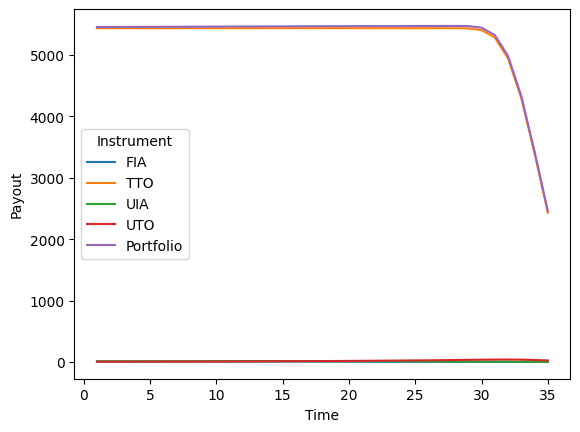

In [7]:
plot = ptfl.plot()
plot.savefig("../output/ptfl_scenario_150.svg")

### Scenario 3: $\gamma = 3$

In [8]:
μ = 0.08
σ =  0.1
π = pi(μ, σ, mort_data, 3.0)

mkt_data = MarketData(μ, σ, π)
ptfl = Portfolio(1e5, 100, 3.0, risk_loadings, mkt_data, mort_data)

res = ptfl.optimise()

100%|██████████| 100/100 [03:06<00:00,  1.87s/it]


#### Weights

In [9]:
ptfl.w

array([0.21596963, 0.35218715, 0.21592164, 0.21592158])

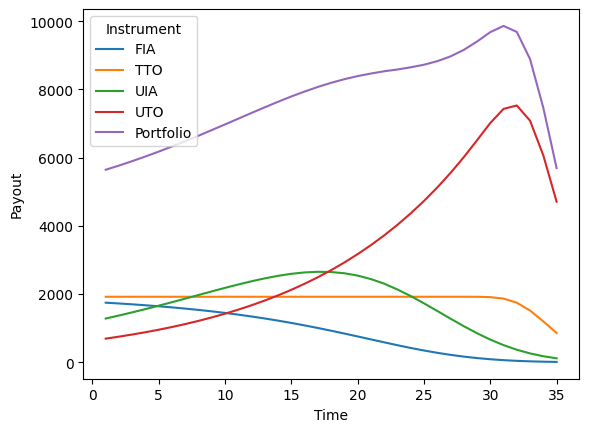

In [10]:
plot = ptfl.plot()
plot.savefig("../output/ptfl_scenario_300.svg")

### Scenario 4: $\gamma = 4.5$

In [11]:
μ = 0.08
σ =  0.1
π = pi(μ, σ, mort_data, 4.5)

mkt_data = MarketData(μ, σ, π)
ptfl = Portfolio(1e5, 100, 4.5, risk_loadings, mkt_data, mort_data)

res = ptfl.optimise()


  5%|▌         | 5/100 [00:13<04:14,  2.68s/it]


#### Weights

In [12]:
ptfl.w

array([0.24999983, 0.2500005 , 0.24999983, 0.24999983])

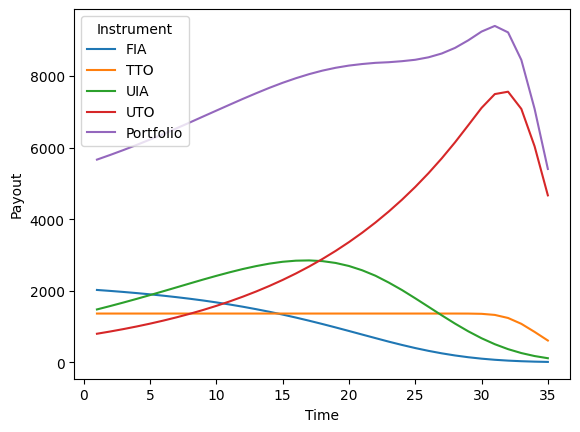

In [13]:
plot = ptfl.plot()
plot.savefig("../output/ptfl_scenario_450.svg")

### Scenario 5: $\gamma = 6$

In [3]:
μ = 0.08
σ =  0.1
π = pi(μ, σ, mort_data, 6.0)

mkt_data = MarketData(μ, σ, π)
ptfl = Portfolio(1e5, 100, 6.0, risk_loadings, mkt_data, mort_data)

res = ptfl.optimise()

 57%|█████▋    | 57/100 [00:13<00:09,  4.38it/s]


#### Weights

In [4]:
ptfl.w

array([0.25, 0.25, 0.25, 0.25])

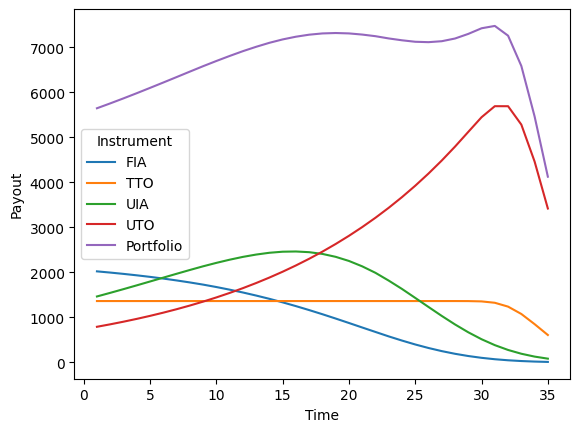

In [5]:
plot = ptfl.plot()
plot.savefig("../output/ptfl_scenario_600.svg")

### Scenario 6: $\gamma = 9$

In [3]:
μ = 0.08
σ =  0.1
π = pi(μ, σ, mort_data, 9.0)

mkt_data = MarketData(μ, σ, π)
ptfl = Portfolio(1e5, 100, 9.0, risk_loadings, mkt_data, mort_data)

res = ptfl.optimise()

  1%|          | 1/100 [00:04<07:39,  4.64s/it]


#### Weights

In [4]:
ptfl.w

array([0.25, 0.25, 0.25, 0.25])

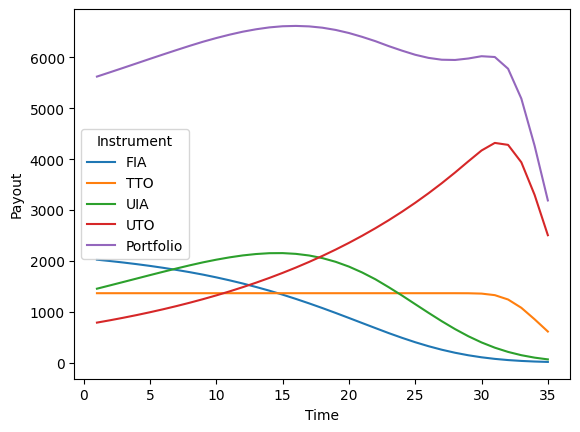

In [5]:
plot = ptfl.plot()
plot.savefig("../output/ptfl_scenario_900.svg")